# Titanic - Machine Learning from Disaster

### Import Relevant Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

### Reading the data from train and test files 

In [2]:
training = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
training['train_test']=1
test['train_test']=0
test_ids=test["PassengerId"]
all_data=pd.concat([training,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

#### Overview 

In [3]:
#understand the data
#use necessary plots to gain an understanding of the data
#value counts
#Check for missing data


### Data Exploration 

Split the data into numeric and non numeric data

1) Numeric Data 
<br> -plot histograms
<br> -corrplot
<br> -pivot table for survival rate across the numeric data

2) Caregoricl data
<br> -bar chart to understand the balance of the data
<br> -pivot table to understand the relationship with survival

In [4]:
training.info()
#we can see that there are a few missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
training.describe().columns
#to seperate the numeric columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
#seperating the numeric and categorical variables for further analysis
df_num=training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat=training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

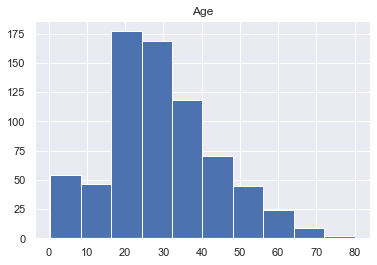

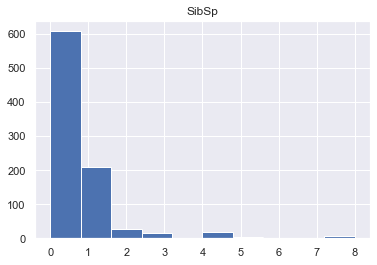

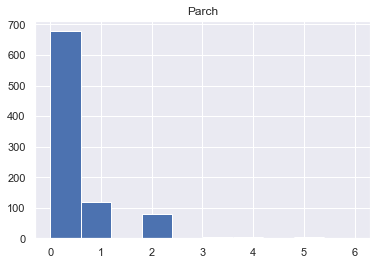

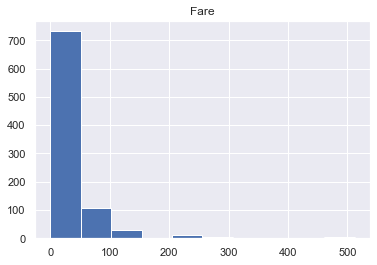

In [8]:
#plotting histogramns for all numeric data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Observation: only age has a normal distribution, the rest of the values dont have a normal distribution

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

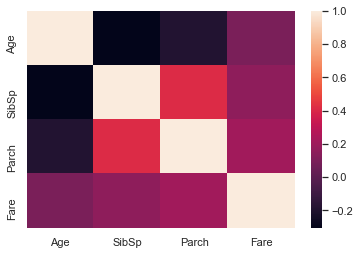

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [10]:
#pivot table of survived againt the numeric data
pd.pivot_table(training,index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Observation: on a average slightly younger people survived
<br> people who paid a higher fare survived

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


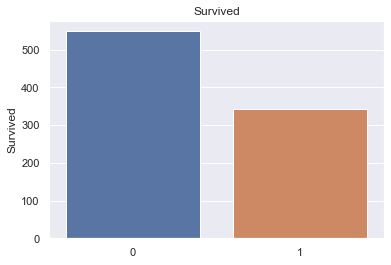

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


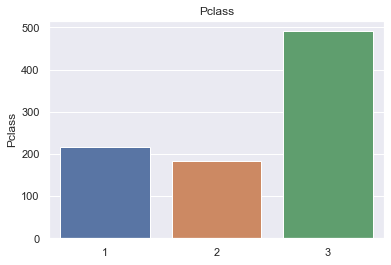

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


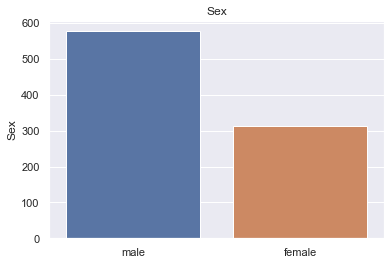

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


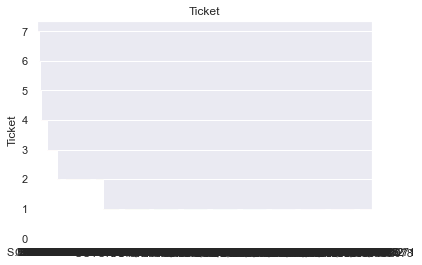

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


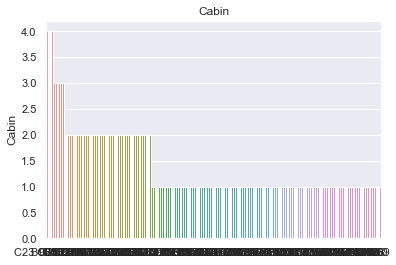

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


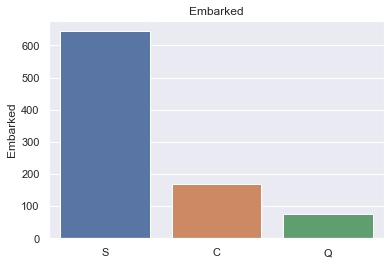

In [11]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
#for i in df_cat.columns:
 #   sns.barplot(x=df_cat[i],y=df_cat[i],data=df_cat[i].value_counts())
  #  plt.show()

In [13]:
print(pd.pivot_table(training, index='Survived', columns='Pclass',values='Ticket',aggfunc='count'))
print(" ")
print(pd.pivot_table(training, index='Survived', columns='Sex',values='Ticket',aggfunc='count'))
print(" ")
print(pd.pivot_table(training, index='Survived', columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
 
Sex       female  male
Survived              
0             81   468
1            233   109
 
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering

Check if these parameters have any relevance with survival
<br> 1) Cabin Nunmber
<br> 2) Ticket Number
<br> 3) Persons name (title ex. Mr,Ms,Master..) 

In [14]:
# 1)Checking if they had multiple cabins
training['cabin_multiple']=training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
print(pd.pivot_table(training,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [16]:
# create categories based on cabin number 
# treat null values as its own category (category n for NULL)
training['cabin_adv']=training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())
print(pd.pivot_table(training,index='Survived',columns='cabin_adv',values='Ticket',aggfunc='count'))

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64
cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


2)Based on the Ticket Number

In [17]:
# split based on if ticket is numeric or non-numeric
training['numeric_ticket']=training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters']=training.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [18]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [19]:
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
wep            3
sopp           3
ppp            2
scah           2
swpp           2
sotono2        2
casoton        1
sop            1
sca4           1
sc             1
as             1
fc             1
scahbasle      1
scow           1
sp             1
fa             1
Name: ticket_letters, dtype: int64

In [20]:
print(pd.pivot_table(training,index='Survived',columns='numeric_ticket',values='Ticket',aggfunc='count'))
pd.pivot_table(training,index='Survived',columns='ticket_letters',values='Ticket',aggfunc='count')

numeric_ticket    0    1
Survived                
0               142  407
1                88  254


ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


3)  based on the persons title

In [21]:
training.Name.head(20)
training['name_title']=training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
training.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Sir               1
Jonkheer          1
Mme               1
Lady              1
the Countess      1
Capt              1
Don               1
Name: name_title, dtype: int64

In [23]:
pd.pivot_table(training,index='Survived',columns='name_title',values='Ticket',aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


### Data Preprocessing

1) Drop null values from Embarked (only 2) <br>
2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)<br>
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. (use onehot encoder).<br>
4) Impute data with mean for fare and age (Should also experiment with median)<br>
5) Normalized fare using logarithm to give more semblance of a normal distribution<br>
6) Scaled data 0-1 with standard scaler

(889,)

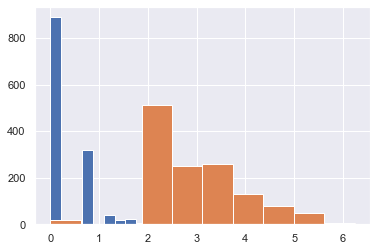

In [24]:
#creating categorical variable for all_data which is the concat of train and test data
all_data['cabin_multiple']=all_data.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv']=all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket']=all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters']=all_data.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)
all_data['name_title']=all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#fill missing values
all_data.Age=all_data.Age.fillna(training.Age.median())
all_data.Fare=all_data.Fare.fillna(training.Fare.median())

#drop null values from Embarked
all_data.dropna(subset=['Embarked'],inplace=True)

#Log trnsformation to normalise the data
all_data['norm_sibsp']= np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

all_data['norm_fare']=np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#convert p-class to string type
all_data.Pclass=all_data.Pclass.astype(str)

#creating dummies 
all_dummies= pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#split to train test
X_train=all_dummies[all_dummies.train_test==1].drop(['train_test'],axis=1)
X_test=all_dummies[all_dummies.train_test==0].drop(['train_test'],axis=1)
y_train=all_data[all_data.train_test==1].Survived
y_train.shape


##### Scale the data

In [25]:
#scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
all_dummies_scaled=all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,0.739957,-0.479537,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0.701127,-0.479537,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.114301,-0.479537,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [26]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scaled=all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)

### Model

In [27]:
#trial model
"""""
X=X_train_scaled
y=y_train
X_tr,X_va,y_tr,y_va=train_test_split(X,y,test_size=0.8,random_state=42)

clf=LogisticRegression(random_state=42,max_iter=1000).fit(X_tr,y_tr)

pred=clf.predict(X_va)
print(accuracy_score(y_va,pred))

print(X)

submission=clf.predict(X_test_scaled)

df = pd.DataFrame({"PassengerId": test_ids.values, "Survived":submission})

df.to_csv("Submission2.csv",index=False)
""""

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
gnb=GaussianNB()
cv=cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [37]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [38]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [39]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [40]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [41]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [42]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [43]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [44]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [45]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [47]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft')

In [48]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.82022472 0.8258427  0.80337079 0.83615819]
0.8189170316765061


In [49]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)